# 🔐 Taller del Algoritmo de Shor

## Computación Cuántica y Criptografía


## Introducción

El algoritmo de Shor, propuesto por Peter Shor en 1994, es un algoritmo cuántico para la factorización de enteros. Dado un entero $N$, encuentra sus factores primos con complejidad de tiempo polinomial, lo cual es significativamente más rápido que los mejores algoritmos clásicos conocidos que se ejecutan en tiempo super-polinomial. Esta eficiencia representa una amenaza para el cifrado RSA, que se basa en la dificultad de la factorización.

Este taller introduce los fundamentos del algoritmo de Shor, explora su mecánica cuántica y demuestra su implementación usando circuitos cuánticos.



# 🔢 Aritmética Modular

Considere $ N, a \in \mathbb{N}$ y $ a \lt N$

$ a \mod N$ es el residuo o resto de la división $a/N$

## Ejemplos:

### 1. Operación Módulo Básica

La operación módulo encuentra el residuo después de dividir un número por otro.

In [1]:
# Operación módulo básica
remainder = 10 % 3
print(f"10 mod 3 = {remainder}")

10 mod 3 = 1


### 2. Módulo con Números Negativos

Las operaciones módulo con números negativos siguen el signo del divisor.

In [2]:
# Módulo con números negativos
negative_modulo = -1 % 371
print(f"-1 mod 371 = {negative_modulo}")

-1 mod 371 = 370


In [3]:
# Módulo con cero
zero_modulo = 0 % 371
print(f"0 mod 371 = {zero_modulo}")

0 mod 371 = 0


## Congruencia

Escribimos $a \equiv b \text{ (mod N)}$ si y solo si $(a \mod N) = (b \mod N)$

O equivalentemente, $a-b= k N$ con k un entero, es decir, $N|(a-b)$, N es divisor de $a-b$

### Ejemplos:
$17 \equiv 2 \text{ (mod 15)}$

$534 \equiv 1479 \text{ (mod 15)}$

$3350 \equiv 2237 \text{ (mod 371)}$

### Ejercicios

Demuestre que:

$1977 \equiv 1 \text{ (mod 247)}$

$16183 \equiv 15442 \text{ (mod 247)}$ 


# 📊 Exponenciación Modular

Supongamos que tenemos un número $N$ y queremos encontrar un factor de $N$. Para facilitar la tarea de encontrar factores de $N$ suponga que $N = 2^n$.

Elijamos aleatoriamente un entero $a$ que sea menor que $N$ tal que $a$ no tenga factores comunes con N (aparte del 1).

Puede probar si $a$ y $N$ tienen factores comunes usando $GCD(a,N)$. Si $GCD(a,N) \neq 1$ hemos encontrado un factor de $N$ y hemos terminado.

Si $GCD(a,N) = 1$, $a$ y $N$ se llaman coprimos. Si $a$ es coprimo con $N$ podemos usar $a$ para el siguiente paso del algoritmo.

Ahora necesitamos calcular la siguiente función:

$f_{a,N}(x)= a^x \mod N$ para todos los enteros entre $0$ y $N$ 

## Ejemplo
Considere N=15 y a=2


### Solución a los ejercicios:

**Ejercicio 1:** Demostrar que $1977 \equiv 1 \text{ (mod 247)}$

Calculemos:

In [4]:
# Ejercicio 1: Demostrar que 1977 ≡ 1 (mod 247)
resultado1 = 1977 % 247
print(f"1977 mod 247 = {resultado1}")
print(f"1 mod 247 = {1 % 247}")
print(f"Por lo tanto, 1977 ≡ 1 (mod 247): {resultado1 == 1}")

# También podemos verificar que 247 divide a (1977 - 1)
diferencia1 = 1977 - 1
cociente1 = diferencia1 / 247
print(f"\n(1977 - 1) / 247 = {cociente1}")
print(f"247 divide a (1977 - 1): {diferencia1 % 247 == 0}")

1977 mod 247 = 1
1 mod 247 = 1
Por lo tanto, 1977 ≡ 1 (mod 247): True

(1977 - 1) / 247 = 8.0
247 divide a (1977 - 1): True


In [5]:
# Ejercicio 2: Demostrar que 16183 ≡ 15442 (mod 247)
resultado2_a = 16183 % 247
resultado2_b = 15442 % 247
print(f"16183 mod 247 = {resultado2_a}")
print(f"15442 mod 247 = {resultado2_b}")
print(f"Por lo tanto, 16183 ≡ 15442 (mod 247): {resultado2_a == resultado2_b}")

# Verificar que 247 divide a (16183 - 15442)
diferencia2 = 16183 - 15442
cociente2 = diferencia2 / 247
print(f"\n(16183 - 15442) / 247 = {cociente2}")
print(f"247 divide a (16183 - 15442): {diferencia2 % 247 == 0}")

16183 mod 247 = 128
15442 mod 247 = 128
Por lo tanto, 16183 ≡ 15442 (mod 247): True

(16183 - 15442) / 247 = 3.0
247 divide a (16183 - 15442): True



Ejemplo: N=15, a=2

Período de f_2,15(x): 4
      x   = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 f(x)_a_N = [1 2 4 8 1 2 4 8 1 2 4 8 1 2 4]


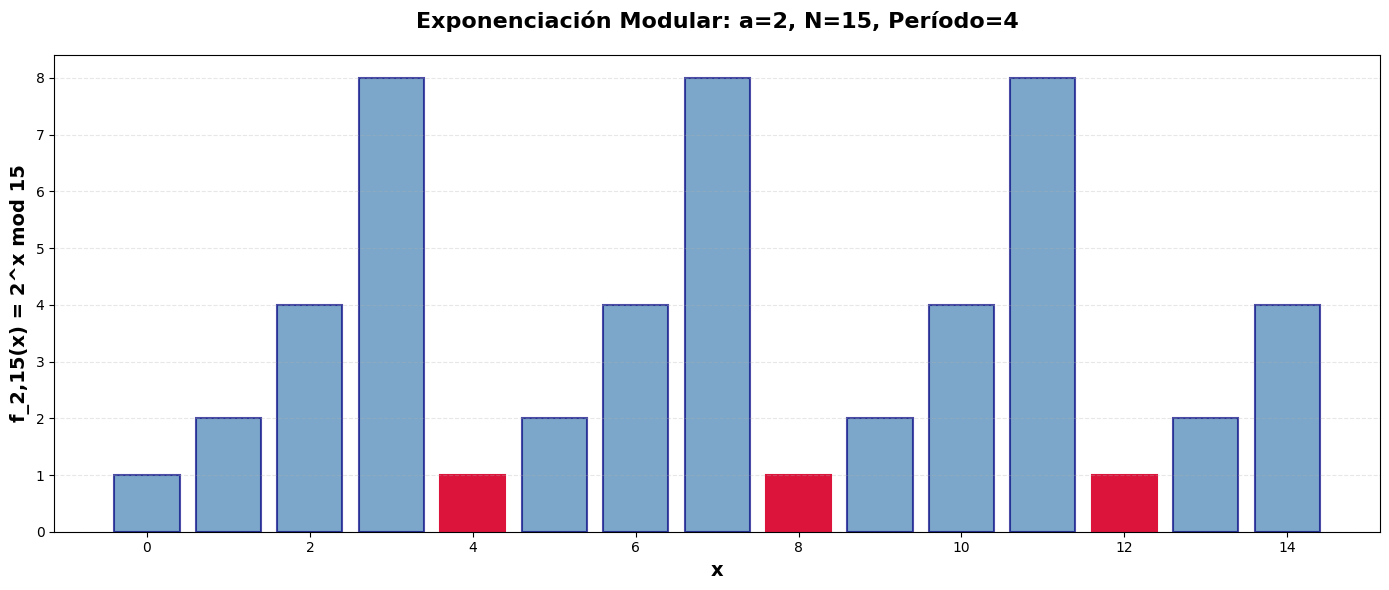

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def powersAModuloN(a, N):
    """
    Calcula a^x mod N para x desde 0 hasta N-1
    
    Parámetros:
    a: base de la exponenciación
    N: módulo
    
    Retorna:
    Lista con los valores de a^x mod N
    """
    powers = []
    for i in range(N):
        powers.append(a**i % N)
    return powers

def periodoDeF(a, N):
    """
    Encuentra el período de la función f_a,N(x) = a^x mod N
    
    El período es el menor r > 0 tal que a^r mod N = 1
    
    Parámetros:
    a: base de la exponenciación
    N: módulo
    
    Retorna:
    El período r
    """
    powers = powersAModuloN(a, N)
    return powers.index(1, 1)

def computeAndDrawPowersAModuloN(a, N):
    """
    Calcula y visualiza la función f_a,N(x) = a^x mod N
    
    Parámetros:
    a: base de la exponenciación
    N: módulo
    """
    powers_a_N = powersAModuloN(a, N)
    period = periodoDeF(a, N)
    
    print(f"Período de f_{a},{N}(x): {period}")
    
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print(f"      x   = {xpoints}")
    print(f" f(x)_a_N = {ypoints}")
    
    # Crear visualización mejorada
    plt.figure(figsize=(14, 6))
    bars = plt.bar(xpoints, ypoints, color='steelblue', edgecolor='navy', alpha=0.7, linewidth=1.5)
    
    # Resaltar las posiciones donde f(x) = 1 (período)
    for i in range(len(ypoints)):
        if ypoints[i] == 1 and i > 0:
            bars[i].set_color('crimson')
            bars[i].set_alpha(1.0)
    
    plt.xlabel('x', fontsize=14, fontweight='bold')
    plt.ylabel(f'f_{a},{N}(x) = {a}^x mod {N}', fontsize=14, fontweight='bold')
    plt.title(f'Exponenciación Modular: a={a}, N={N}, Período={period}', 
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

# Ejemplo con N=15 y a=2
N = 15
a = 2
print(f"\n{'='*60}")
print(f"Ejemplo: N={N}, a={a}")
print(f"{'='*60}\n")
computeAndDrawPowersAModuloN(a, N)


Ejemplo: N=15, a=4

Período de f_4,15(x): 2
      x   = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 f(x)_a_N = [1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


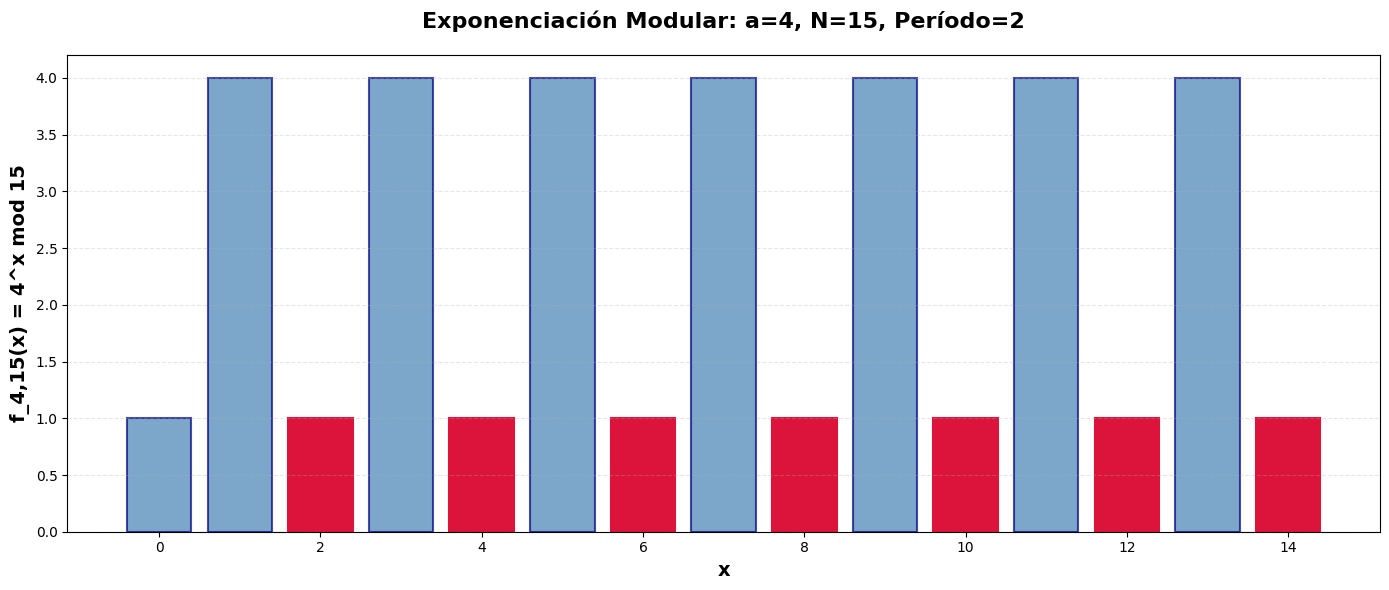

In [7]:
# Ejemplo con N=15 y a=4
N = 15
a = 4
print(f"\n{'='*60}")
print(f"Ejemplo: N={N}, a={a}")
print(f"{'='*60}\n")
computeAndDrawPowersAModuloN(a, N)


Ejemplo: N=15, a=13

Período de f_13,15(x): 4
      x   = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 f(x)_a_N = [ 1 13  4  7  1 13  4  7  1 13  4  7  1 13  4]


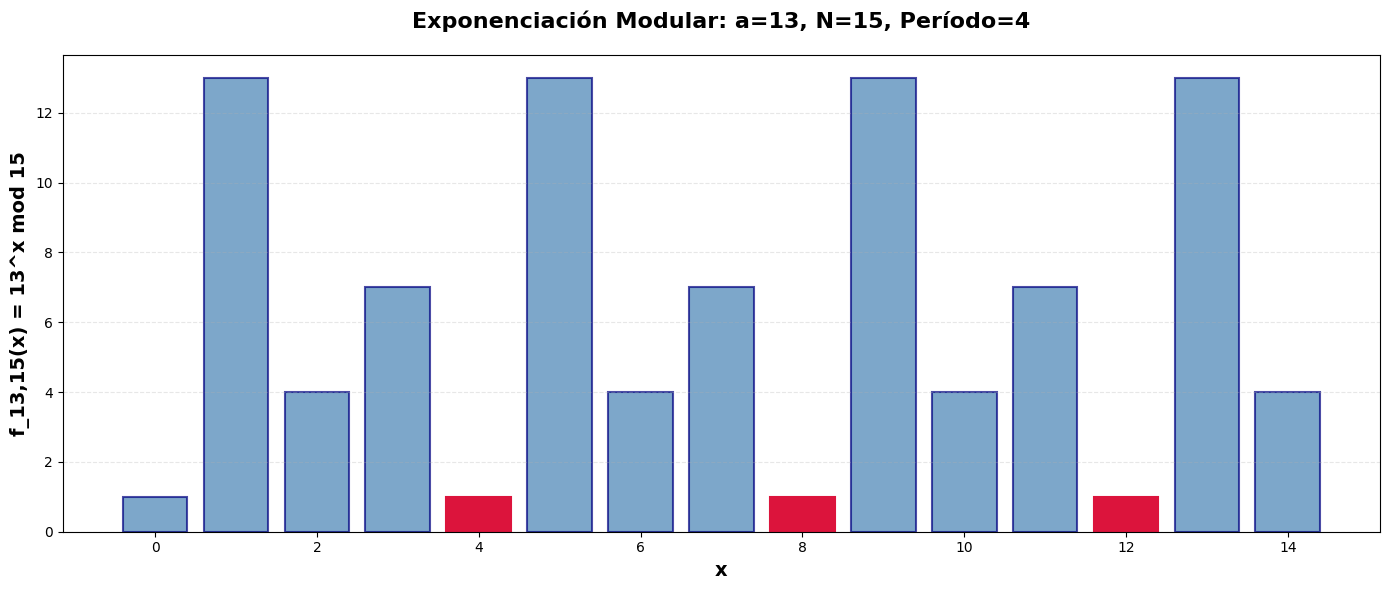

In [8]:
# Ejemplo con N=15 y a=13
N = 15
a = 13
print(f"\n{'='*60}")
print(f"Ejemplo: N={N}, a={a}")
print(f"{'='*60}\n")
computeAndDrawPowersAModuloN(a, N)


Ejemplo: N=371, a=2

Período de f_2,371(x): 156
      x   = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 23

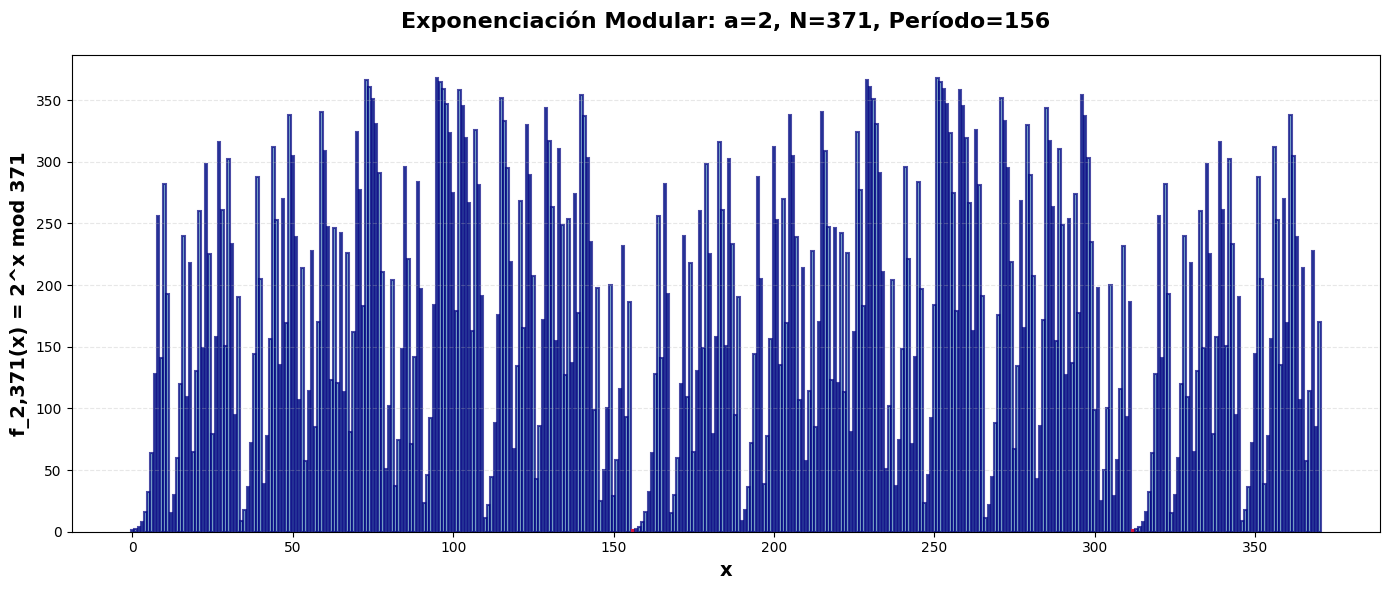

In [9]:
# Ejemplo con N=371 y a=2
N = 371
a = 2
print(f"\n{'='*60}")
print(f"Ejemplo: N={N}, a={a}")
print(f"{'='*60}\n")
computeAndDrawPowersAModuloN(a, N)

## ⚡ Una forma más eficiente de calcular $f_{a,N}(x)$

### ¿Podemos calcular $f_{a,N}(x)$ de manera más eficiente?

Si $a \equiv a' \text{ (mod N)}$ y $b \equiv b' \text{ (mod N)}$, entonces

$$a \times b \equiv a' \times b' \text{ (mod N)}$$ 

y

$$ (a \times b) \mod N = ((a \mod N) \times (b\mod N)) \mod N$$

De esto podemos escribir:

$$a^x \mod N = a^{x-1} \times a \mod N = ((a^{x-1} \mod N) \times (a \mod N)) \mod N$$

donde $a \mod N = a$ porque $a < N$, entonces podemos simplificar aún más:

$$f_{a,N}(x)=a^x \mod N = ((a^{x-1} \mod N) \times a) \mod N$$

con 
$$f_{a,N}(0) = a^0 \mod N = 1$$

In [10]:
def powersAModuloNRecursive(a, N):
    """
    Calcula a^x mod N de forma recursiva (más eficiente)
    
    Usa la propiedad: a^x mod N = ((a^(x-1) mod N) * a) mod N
    
    Parámetros:
    a: base de la exponenciación
    N: módulo
    
    Retorna:
    Lista con los valores de a^x mod N
    """
    powers = []
    powers.append(1)  # a^0 mod N = 1

    for i in range(1, N):
        powers.append((powers[i-1] * a) % N)
    return powers

def computeAndDrawRecursivelyPowersAModuloN(a, N):
    """
    Calcula y visualiza la función f_a,N(x) usando el método recursivo
    
    Parámetros:
    a: base de la exponenciación
    N: módulo
    """
    powers_a_N = powersAModuloNRecursive(a, N)
    period = periodoDeF(a, N)
    
    print(f"Período de f_{a},{N}(x): {period}")
    
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print(f"      x   = {xpoints}")
    print(f" f(x)_a_N = {ypoints}")
    
    # Crear visualización mejorada
    plt.figure(figsize=(14, 6))
    bars = plt.bar(xpoints, ypoints, color='forestgreen', edgecolor='darkgreen', alpha=0.7, linewidth=1.5)
    
    # Resaltar las posiciones donde f(x) = 1 (período)
    for i in range(len(ypoints)):
        if ypoints[i] == 1 and i > 0:
            bars[i].set_color('orange')
            bars[i].set_alpha(1.0)
    
    plt.xlabel('x', fontsize=14, fontweight='bold')
    plt.ylabel(f'f_{a},{N}(x) = {a}^x mod {N}', fontsize=14, fontweight='bold')
    plt.title(f'Exponenciación Modular (Método Recursivo): a={a}, N={N}, Período={period}', 
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()


Ejemplo (Método Recursivo): N=371, a=24

Período de f_24,371(x): 78
      x   = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 22

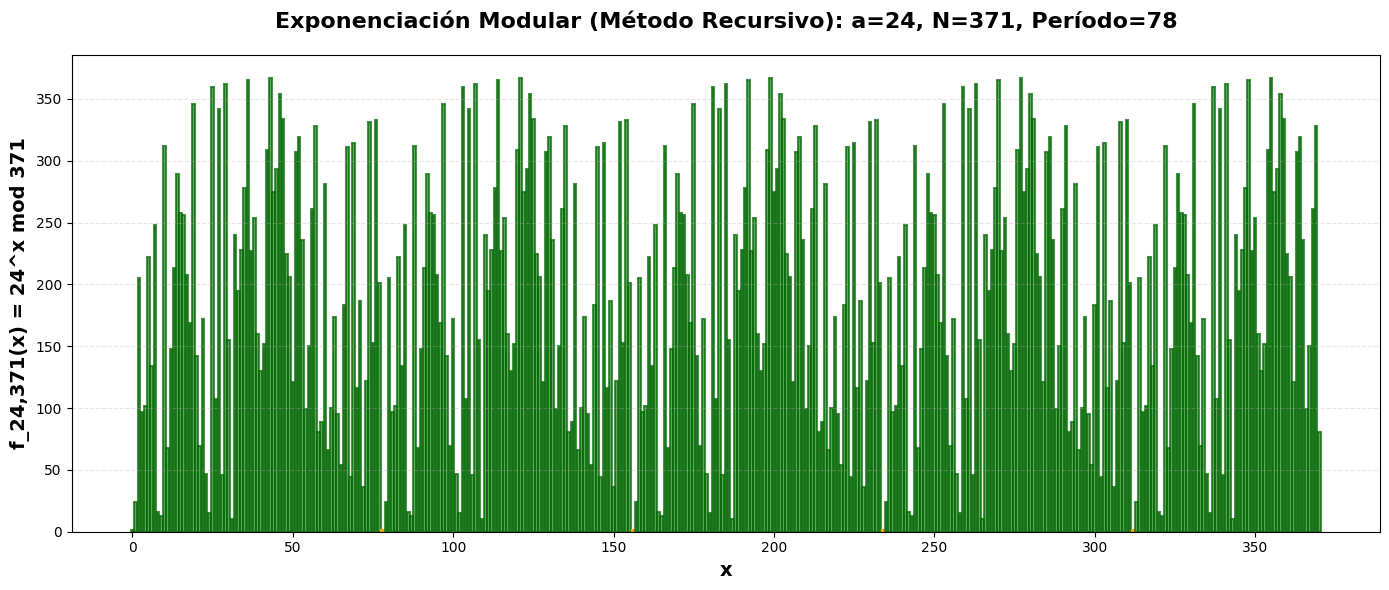

In [11]:
# Ejemplo con N=371 y a=24
N = 371
a = 24
print(f"\n{'='*60}")
print(f"Ejemplo (Método Recursivo): N={N}, a={a}")
print(f"{'='*60}\n")
computeAndDrawRecursivelyPowersAModuloN(a, N)


Ejemplo (Método Recursivo): N=371, a=6

Período de f_6,371(x): 26
      x   = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 

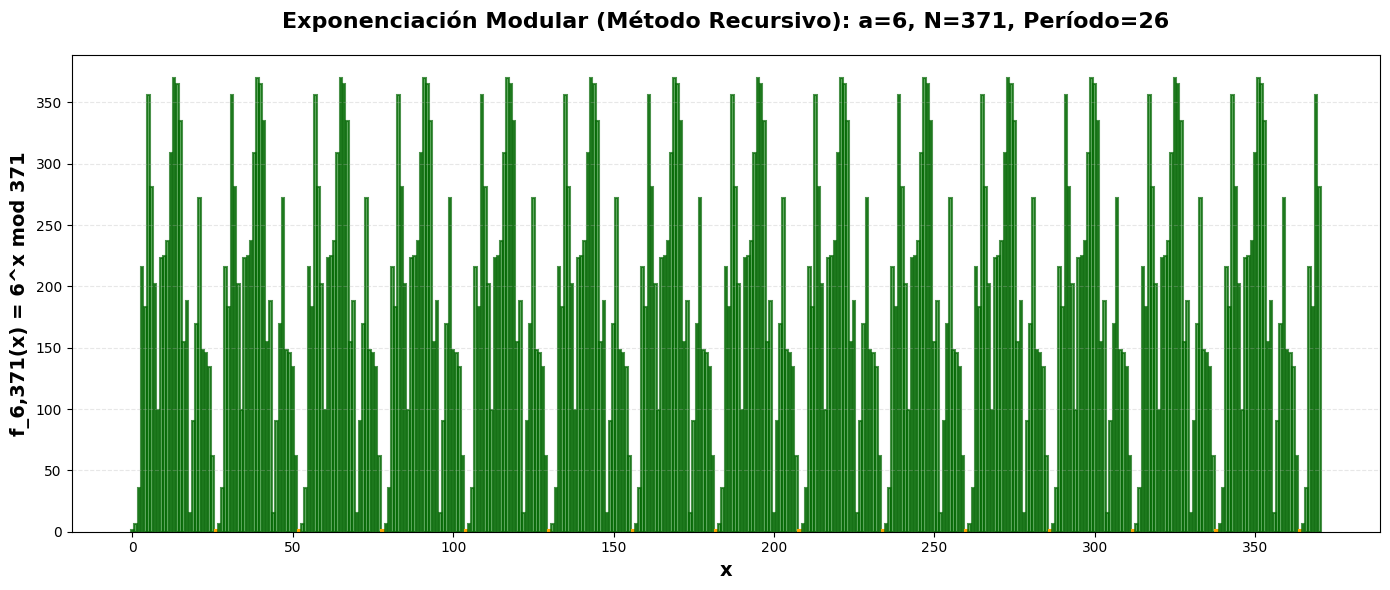

In [12]:
# Ejemplo con N=371 y a=6
N = 371
a = 6
print(f"\n{'='*60}")
print(f"Ejemplo (Método Recursivo): N={N}, a={a}")
print(f"{'='*60}\n")
computeAndDrawRecursivelyPowersAModuloN(a, N)

## 🔍 Encontrando el período de $f_{a,N}$

Lo que necesitamos es el período de la función, es decir, necesitamos encontrar el menor $r > 0$ tal que

$$ f_{a,N}(r) = a^r \mod N = 1$$

Podemos hacer esto por simple inspección de las figuras.

## Ejemplo

In [13]:
# Ejemplo: Encontrar el período
N = 371
a = 6

period = periodoDeF(a, N)
print(f"Período de f_{a},{N}(x): {period}")
print(f"\nVerificación: {a}^{period} mod {N} = {(a**period) % N}")

Período de f_6,371(x): 26

Verificación: 6^26 mod 371 = 1


Un teorema de teoría de números dice que para cualquier $a$ coprimo con $N$ donde $a ≤ N$, la función $f_{a,N}$ producirá un 1 para algún $r < N$. Después de esto, la secuencia de números se repetirá. 

Si $f_{a,N}(r) = 1$, entonces

$$ f_{a,N}(x+r) = f_{a,N}(x) $$

## 🎯 Del Período a los Factores

Necesitamos un número par como período. Si el período no es par, elija otro $a$ y repita el cálculo.

Con la información del período $r$ ahora podemos calcular los factores de la siguiente manera:

Sabemos que 

$a^r \equiv 1 \text{ ( mod N)}$

Restamos 1 de ambos lados

$a^r -1 \equiv 0 \text{ ( mod N)}$

Así, $N$ es un divisor de $a^r -1$

$ N|(a^r -1)$

Sabemos que $x^2 - y^2 = (x+y)(x-y)$, entonces podemos reescribir

$ N|(\sqrt{a^r} + 1)(\sqrt{a^r} - 1)$

o

$ N|(a^\frac{r}{2} + 1)(a^\frac{r}{2} - 1)$   

**Nota:** Si $r$ fuera impar no podríamos dividir por 2 y obtener un entero

De esta ecuación ahora sabemos que cualquier factor de N también es un factor de $(a^\frac{r}{2} + 1)$ o de $(a^\frac{r}{2} - 1)$ o de ambos.

Entonces podemos encontrar los factores buscando en:

$GCD(a^\frac{r}{2} + 1, N)$ 

o

$GCD(a^\frac{r}{2} - 1, N)$

GCD puede implementar el algoritmo euclidiano clásico.

**IMPORTANTE:** $a^\frac{r}{2} \not\equiv -1 \text{ (mod N)}$ si es así, elija otro $a$.

## Examples


EJEMPLO DE FACTORIZACIÓN: N=371, a=24

1. Período de f_24,371(x): r = 78

2. Verificaciones:
   - ¿El período es par? True
   - 24^(78/2) mod 371 = 160
   - -1 mod 371 = 370
   - ¿24^(78/2) ≠ -1 (mod 371)? True

3. Cálculo de factores:
   Factor 1 = GCD(24^(78/2) + 1, 371) = GCD(673346220481905860719963226704206593022095630190772225, 371) = 7
   Factor 2 = GCD(24^(78/2) - 1, 371) = GCD(673346220481905860719963226704206593022095630190772223, 371) = 53

4. Verificación:
   7 × 53 = 371
   ✓ Factorización correcta: 371 = 7 × 53


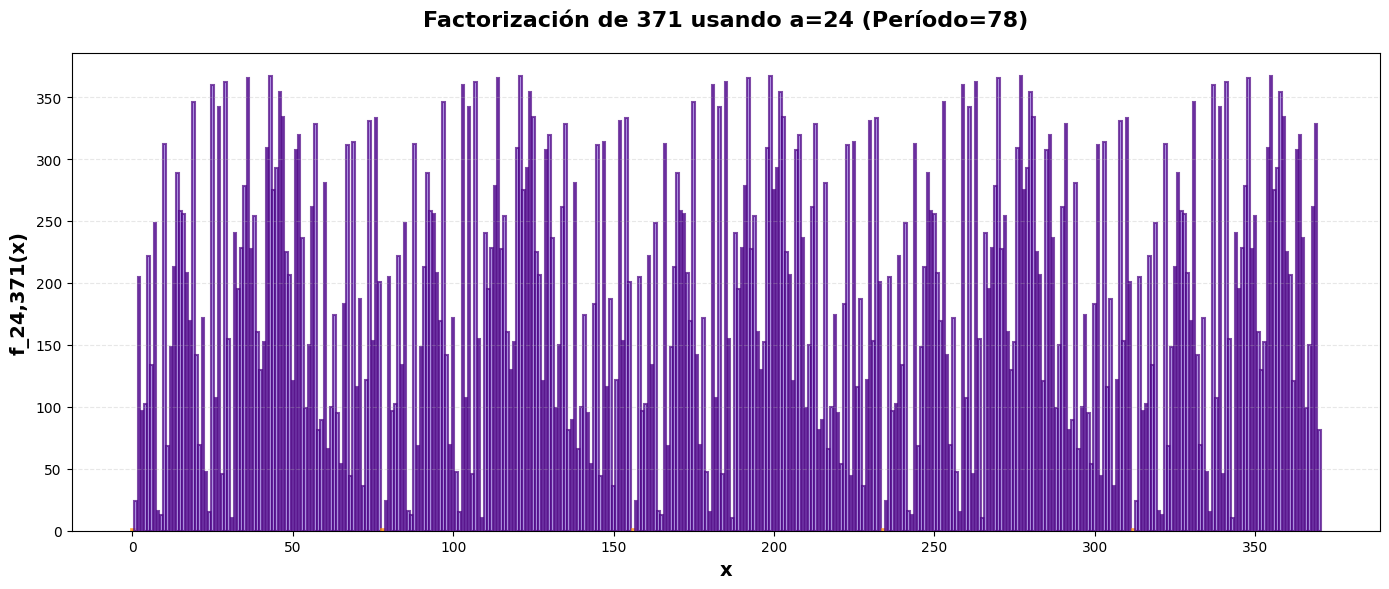

In [14]:
def findPeriod(a, N):
    """
    Encuentra el período de f_a,N(x) = a^x mod N
    
    Parámetros:
    a: base
    N: módulo
    
    Retorna:
    El período r
    """
    powers = powersAModuloNRecursive(a, N)
    return powers.index(1, 1)

def gcd(a, b):
    """
    Calcula el Máximo Común Divisor usando el algoritmo de Euclides
    
    Parámetros:
    a, b: números enteros
    
    Retorna:
    El MCD de a y b
    """
    while b != 0:
        t = b
        b = a % b
        a = t
    return a

if __name__ == '__main__':
    N = 371
    a = 24
    
    print(f"\n{'='*70}")
    print(f"EJEMPLO DE FACTORIZACIÓN: N={N}, a={a}")
    print(f"{'='*70}\n")
    
    # Calcular potencias y período
    powers_a_N = powersAModuloNRecursive(a, N)
    period = findPeriod(a, N)
    
    print(f"1. Período de f_{a},{N}(x): r = {period}")
    
    # Verificar condiciones
    print(f"\n2. Verificaciones:")
    print(f"   - ¿El período es par? {period % 2 == 0}")
    
    valor_mitad = (a**(period//2)) % N
    valor_menos_uno = (-1) % N
    print(f"   - {a}^({period}/2) mod {N} = {valor_mitad}")
    print(f"   - -1 mod {N} = {valor_menos_uno}")
    print(f"   - ¿{a}^({period}/2) ≠ -1 (mod {N})? {valor_mitad != valor_menos_uno}")
    
    # Calcular factores
    print(f"\n3. Cálculo de factores:")
    factor1 = gcd(int(a**(period//2)) + 1, N)
    factor2 = gcd(int(a**(period//2)) - 1, N)
    
    print(f"   Factor 1 = GCD({a}^({period}/2) + 1, {N}) = GCD({int(a**(period//2)) + 1}, {N}) = {factor1}")
    print(f"   Factor 2 = GCD({a}^({period}/2) - 1, {N}) = GCD({int(a**(period//2)) - 1}, {N}) = {factor2}")
    
    # Verificación
    print(f"\n4. Verificación:")
    print(f"   {factor1} × {factor2} = {factor1 * factor2}")
    print(f"   ✓ Factorización correcta: {N} = {factor1} × {factor2}")
    
    # Visualización
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)
    
    plt.figure(figsize=(14, 6))
    bars = plt.bar(xpoints, ypoints, color='mediumpurple', edgecolor='indigo', alpha=0.7, linewidth=1.5)
    
    # Resaltar el período
    for i in range(0, N, period):
        if i < len(bars):
            bars[i].set_color('gold')
            bars[i].set_edgecolor('darkorange')
            bars[i].set_linewidth(2)
    
    plt.xlabel('x', fontsize=14, fontweight='bold')
    plt.ylabel(f'f_{a},{N}(x)', fontsize=14, fontweight='bold')
    plt.title(f'Factorización de {N} usando a={a} (Período={period})', 
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    print(f"\n{'='*70}")

## 💡 Ejercicio
Calcule los factores de $N=247$ usando $a=2$

### Solución: Factorización de N=247 con a=2

FACTORIZACIÓN DE N=247 USANDO a=2

1. Verificar que GCD(2, 247) = 1
   2 y 247 son coprimos, podemos continuar.

2. Calcular el período de f_2,247(x) = 2^x mod 247
   Período r = 36
   ✓ El período 36 es par, podemos continuar.

3. Verificar que 2^(36/2) mod 247 ≠ -1 mod 247
   2^18 mod 247 = 77
   -1 mod 247 = 246
   ✓ 2^(36/2) ≢ -1 (mod 247), podemos continuar.

4. Calcular los factores usando el GCD
   Factor 1 = GCD(2^(36/2) + 1, 247) = GCD(262145, 247) = 13
   Factor 2 = GCD(2^(36/2) - 1, 247) = GCD(262143, 247) = 19

5. Verificación:
   13 × 19 = 247
   ✓ Factorización correcta: 247 = 13 × 19

RESULTADO: Los factores de 247 son 13 y 19


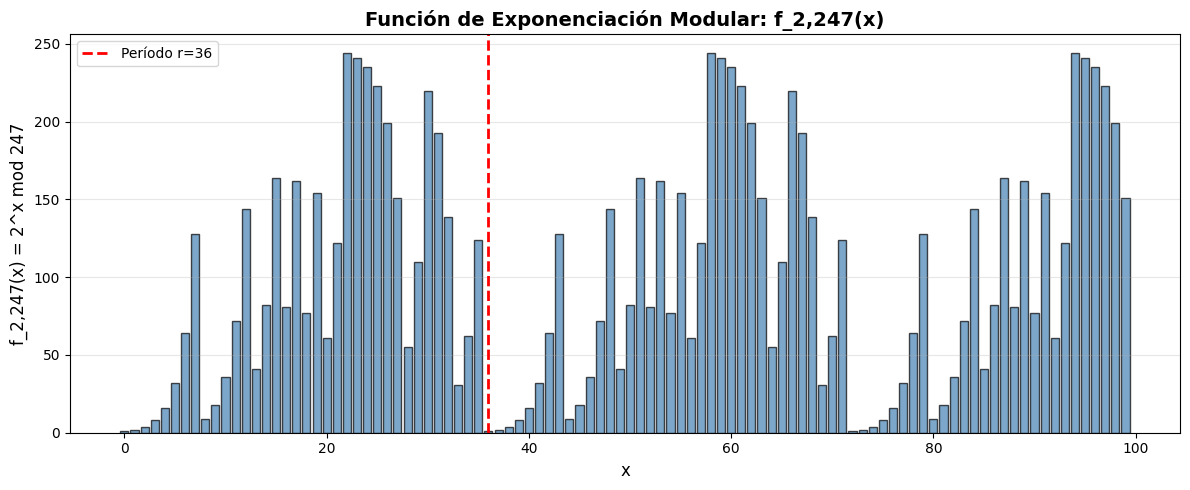

In [15]:
# Solución completa del ejercicio: Factorización de N=247 con a=2

N = 247
a = 2

print("="*60)
print(f"FACTORIZACIÓN DE N={N} USANDO a={a}")
print("="*60)

# Paso 1: Verificar que a y N son coprimos
factor_comun = gcd(a, N)
print(f"\n1. Verificar que GCD({a}, {N}) = {factor_comun}")
if factor_comun != 1:
    print(f"   ¡{a} y {N} tienen un factor común: {factor_comun}!")
    print(f"   Ya encontramos un factor de {N}")
else:
    print(f"   {a} y {N} son coprimos, podemos continuar.")

# Paso 2: Calcular el período de f_{a,N}
print(f"\n2. Calcular el período de f_{a},{N}(x) = {a}^x mod {N}")
powers_a_N = powersAModuloNRecursive(a, N)
period = findPeriod(a, N)
print(f"   Período r = {period}")

# Verificar que el período es par
if period % 2 != 0:
    print(f"   ERROR: El período {period} es impar. Se debe elegir otro valor de a.")
else:
    print(f"   ✓ El período {period} es par, podemos continuar.")

# Paso 3: Verificar que a^(r/2) no es congruente con -1 mod N
valor_mitad = (a**(period//2)) % N
valor_menos_uno = (-1) % N
print(f"\n3. Verificar que {a}^({period}/2) mod {N} ≠ -1 mod {N}")
print(f"   {a}^{period//2} mod {N} = {valor_mitad}")
print(f"   -1 mod {N} = {valor_menos_uno}")

if valor_mitad == valor_menos_uno:
    print(f"   ERROR: {a}^({period}/2) ≡ -1 (mod {N}). Se debe elegir otro valor de a.")
else:
    print(f"   ✓ {a}^({period}/2) ≢ -1 (mod {N}), podemos continuar.")

# Paso 4: Calcular los factores usando GCD
print(f"\n4. Calcular los factores usando el GCD")
factor1 = gcd((a**(period//2)) + 1, N)
factor2 = gcd((a**(period//2)) - 1, N)

print(f"   Factor 1 = GCD({a}^({period}/2) + 1, {N}) = GCD({(a**(period//2)) + 1}, {N}) = {factor1}")
print(f"   Factor 2 = GCD({a}^({period}/2) - 1, {N}) = GCD({(a**(period//2)) - 1}, {N}) = {factor2}")

# Paso 5: Verificar la factorización
print(f"\n5. Verificación:")
print(f"   {factor1} × {factor2} = {factor1 * factor2}")
if factor1 * factor2 == N:
    print(f"   ✓ Factorización correcta: {N} = {factor1} × {factor2}")
else:
    print(f"   Verificando con otros factores...")

print("\n" + "="*60)
print(f"RESULTADO: Los factores de {N} son {factor1} y {factor2}")
print("="*60)

# Visualización del período
plt.figure(figsize=(12, 5))
xpoints = np.array(range(min(100, N)))
ypoints = np.array(powers_a_N[:min(100, N)])
plt.bar(xpoints, ypoints, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(x=period, color='red', linestyle='--', linewidth=2, label=f'Período r={period}')
plt.xlabel('x', fontsize=12)
plt.ylabel(f'f_{a},{N}(x) = {a}^x mod {N}', fontsize=12)
plt.title(f'Función de Exponenciación Modular: f_{a},{N}(x)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ⚛️ El Algoritmo Cuántico

$a$ siempre es menor que $N$ por lo que necesitamos $n=\log_2 N$ qubits como salida.

Necesitamos evaluar $f_{a,N}$ en al menos $N^2$ valores de $x$, entonces $m = \log_2 N^2 = 2 \log_2 N = 2n$

![Algoritmo de Shor](images/shoralgorithm.jpg)

$\ket{\psi_0} = \ket{\boldsymbol{0_m}, \boldsymbol{0_n}}$

$\ket{\psi_1} = \frac{1}{\sqrt{2^m}}\sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, \boldsymbol{0_n}}$

$\ket{\psi_2} = \frac{1}{\sqrt{2^m}} \sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, f_{a,N}\boldsymbol{x}}$

$\ket{\psi_2} = \frac{1}{\sqrt{2^m}} \sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, a^{\boldsymbol{x}}
\mod N}$

# 📋 Algoritmo de Shor (Resumen Completo)

**Entrada:** Un entero positivo N con n = ⌈log₂ N⌉. 

**Salida:** Un factor p de N si existe. 

**Paso 1:** Use un algoritmo polinomial para determinar si N es primo o una potencia de primo. Si es primo, declare que lo es y salga. Si es una potencia de un número primo, declare que lo es y salga. 

**Paso 2:** Elija aleatoriamente un entero a tal que 1 < a < N. Ejecute el algoritmo de Euclides para determinar GCD(a, N). Si el GCD no es 1, entonces devuélvalo y salga. 

**Paso 3:** Use un circuito cuántico para encontrar el período r. 

**Paso 4:** Si r es impar o si a^(r/2) ≡ -1 mod N, entonces vuelva al Paso 2 y elija otro a. 

**Paso 5:** Use el algoritmo de Euclides para calcular GCD(a^(r/2) + 1, N) y GCD(a^(r/2) - 1, N). Devuelva al menos una de las soluciones no triviales.


## 📚 Lecturas Adicionales

Para aquellos interesados en profundizar en el algoritmo de Shor y la computación cuántica, aquí hay algunos recursos:

- Yanofsky, Noson S.; Mannucci, Mirco A.. Quantum Computing for Computer Scientists (English Edition) (p. 217). Cambridge University Press. Kindle Edition. 
- Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information.
- Kaye, P., Laflamme, R., & Mosca, M. (2007). An Introduction to Quantum Computing.
- [Documentación de Qiskit](https://qiskit.org/documentation/)
- [IBM Quantum Experience](https://quantum-computing.ibm.com/)

---

### 🎓 Autor

**Taller de Algoritmo de Shor**  
Computación Cuántica y Criptografía

© 2025 - Todos los derechos reservados
